In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"firazafifudin","key":"cfb6e580069f5d4f15b60885906cc4c5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d kmldas/loan-default-prediction

Dataset URL: https://www.kaggle.com/datasets/kmldas/loan-default-prediction
License(s): copyright-authors


In [ ]:
!mkdir loan-default-prediction
!unzip loan-default-prediction.zip -d loan-default-prediction
!ls loan-default-prediction

Archive:  loan-default-prediction.zip
  inflating: loan-default-prediction/Default_Fin.csv  
Default_Fin.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/loan-default-prediction/Default_Fin.csv')

In [ ]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [ ]:
X = df.drop(columns=["Defaulted?"])
y = df["Defaulted?"]

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_encoded,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(le.classes_), activation="softmax")
])

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,042 (43.13 KB)

 Trainable params: 11,042 (43.13 KB)

 Non-trainable params: 0 (0.00 B)

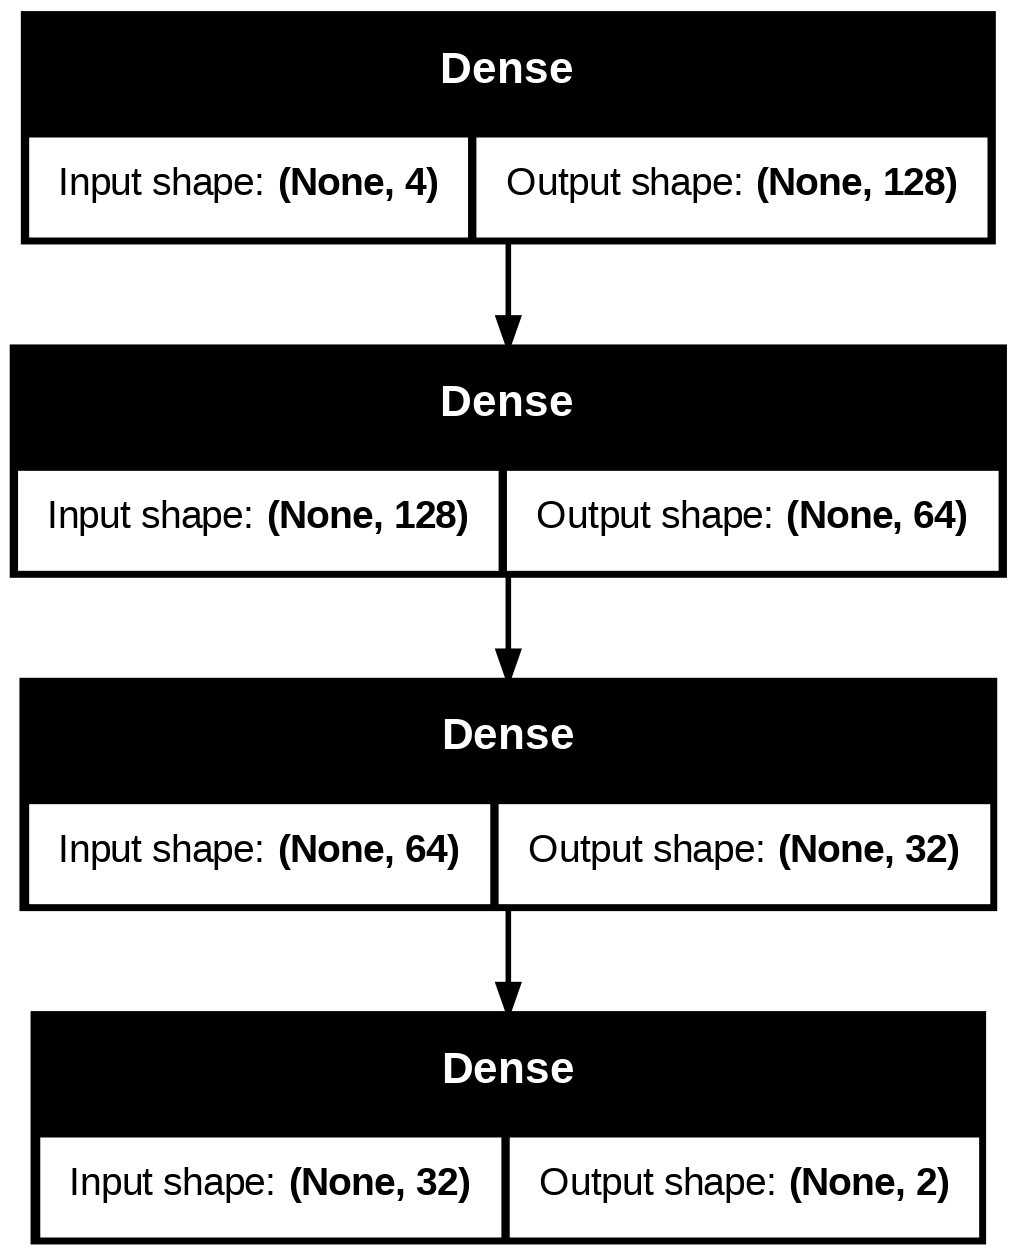

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=55,
                    batch_size=10,
                    validation_data=(X_test, y_test))

Epoch 1/55
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9545 - loss: 0.1822 - val_accuracy: 0.9655 - val_loss: 0.0966
Epoch 2/55
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9725 - loss: 0.0835 - val_accuracy: 0.9655 - val_loss: 0.0941
Epoch 3/55
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9746 - loss: 0.0817 - val_accuracy: 0.9655 - val_loss: 0.0958
Epoch 4/55
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9728 - loss: 0.0781 - val_accuracy: 0.9705 - val_loss: 0.0886
Epoch 5/55
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9752 - loss: 0.0759 - val_accuracy: 0.9635 - val_loss: 0.0981
Epoch 6/55
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9733 - loss: 0.0805 - val_accuracy: 0.9680 - val_loss: 0.0915
Epoch 7/55
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9748 - loss: 0.0750 - val_accuracy: 0.9690 - val_loss: 0.0913
Epoch 8/55
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9754 - loss: 0.0727 - val_accuracy: 0.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9576 - loss: 0.1223
Akurasi Model: 0.9665
Loss Model: 0.0991


In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

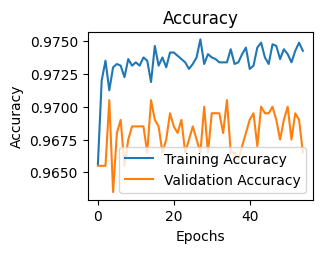

In [ ]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

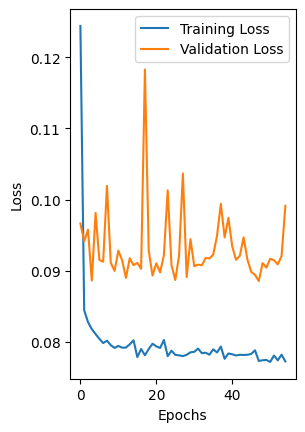

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


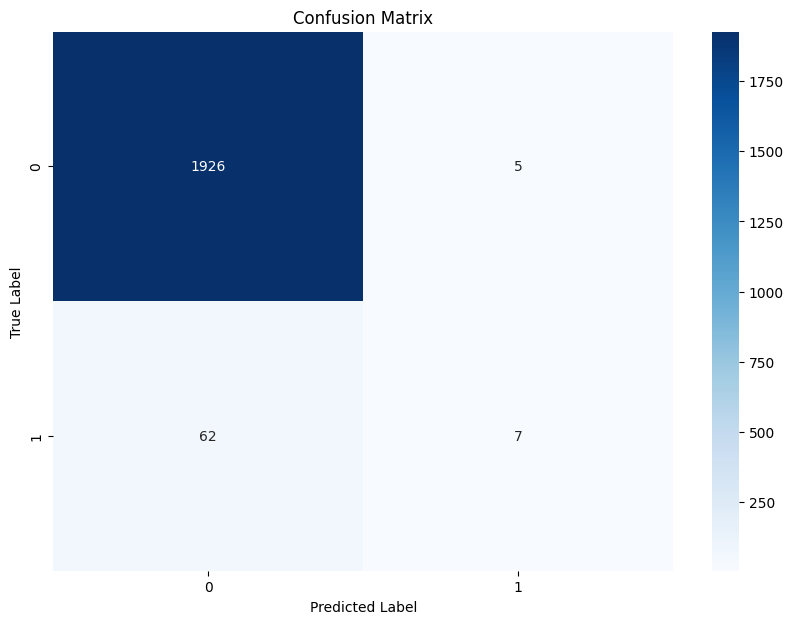

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1931
           1       0.58      0.10      0.17        69

    accuracy                           0.97      2000
   macro avg       0.78      0.55      0.58      2000
weighted avg       0.96      0.97      0.95      2000



In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

In [ ]:
sample_input = np.array([[78, 42 ,42, 20.13, 81.60, 7.62, 262.71]])
sample_input_df = pd.DataFrame(sample_input)

In [ ]:
new_scaler = MinMaxScaler()

In [ ]:
new_scaler.fit(sample_input_df)

MinMaxScaler()

In [ ]:
sample_input_scaled = new_scaler.transform(sample_input_df)

In [ ]:
sample_input = np.array([[78, 42 ,42, 20.13, 81.60, 7.62, 262.71]])

In [ ]:
sample_input_subset = sample_input[:, :X_train.shape[1]]

In [ ]:
sample_input_scaled = scaler.transform(sample_input_subset)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
predicted_class = np.argmax(model.predict(sample_input_scaled))
predicted_crop = le.inverse_transform([predicted_class])

print(f"Penjualan yang di prediksi: {predicted_crop[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Penjualan yang di prediksi: 0


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('loan_default.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpotww5_3f'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  138782096348688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138781056892560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138782096346960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138782096347152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138781056892752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138782096347536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138781057140304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138781057140112: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']